### Assignmnet of LGBM & XGBM for Titanic data set

### Task 1 : Loading dataset Titanic_test into python

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load Titanic dataset
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
titanic_df[['Age']] = imputer.fit_transform(titanic_df[['Age']])

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,NaN,22.0,1,0,7.2500,NaN
1,2,1,1,190,NaN,38.0,1,0,71.2833,NaN
2,3,1,3,353,NaN,26.0,0,0,7.9250,NaN
3,4,1,1,272,NaN,35.0,1,0,53.1000,NaN
4,5,0,3,15,NaN,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,NaN,27.0,0,0,13.0000,NaN
887,888,1,1,303,NaN,19.0,0,0,30.0000,NaN
888,889,0,3,413,NaN,28.0,1,2,23.4500,NaN
889,890,1,1,81,NaN,26.0,0,0,30.0000,NaN


In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Fare             0
Embarked       891
dtype: int64

In [52]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,NaN,22.0,1,0,7.2500,NaN
1,2,1,1,190,NaN,38.0,1,0,71.2833,NaN
2,3,1,3,353,NaN,26.0,0,0,7.9250,NaN
3,4,1,1,272,NaN,35.0,1,0,53.1000,NaN
4,5,0,3,15,NaN,35.0,0,0,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,NaN,27.0,0,0,13.0000,NaN
887,888,1,1,303,NaN,19.0,0,0,30.0000,NaN
888,889,0,3,413,NaN,28.0,1,2,23.4500,NaN
889,890,1,1,81,NaN,26.0,0,0,30.0000,NaN


In [64]:
# Imputation using Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Fit and transform categorical columns
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'].fillna('Unknown'))
titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'].fillna('Unknown'))
titanic_df['Name'] = le.fit_transform(titanic_df['Name'].fillna('Unknown'))

# Check missing values after imputation
print("\nMissing Values After Imputation:")
print(titanic_df.isnull().sum())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [68]:
# Encode categorical variables
categorical_cols = titanic_df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    titanic_df[col] = le.fit_transform(titanic_df[col])
titanic_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,108,0,22.0,1,0,7.2500,0
1,2,1,1,190,0,38.0,1,0,71.2833,0
2,3,1,3,353,0,26.0,0,0,7.9250,0
3,4,1,1,272,0,35.0,1,0,53.1000,0
4,5,0,3,15,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,0,27.0,0,0,13.0000,0
887,888,1,1,303,0,19.0,0,0,30.0000,0
888,889,0,3,413,0,28.0,1,2,23.4500,0
889,890,1,1,81,0,26.0,0,0,30.0000,0


In [70]:


# Split data into training and testing sets
X = titanic_df.drop('Survived', axis=1)  # Features (drop 'Survived' column)
y = titanic_df['Survived']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Task 2 Building model LIGHT GBM 

In [72]:

!pip install lightgbm
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train LightGBM model
# Convert categorical columns
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop text columns
text_columns = ['Ticket', 'Cabin']
text_columns = [col for col in text_columns if col in titanic_df.columns]
titanic_df = titanic_df.drop(text_columns, axis=1)

# Split data into training and testing sets
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LightGBM model
lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Make predictions
lgb_pred = lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 665
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### Task 3: Model Building XGBoost Model

In [74]:
import xgboost as xgb

# Train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)
print("Predictions:", xgb_pred)

Predictions: [0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1]


### Task 4 : Comapring LightGBM and XGBoost Performances Metrics

In [76]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate metrics for LightGBM
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

# Calculate metrics for XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Print metrics
print("      :LightGBM Metrics :  ")
print("Accuracy:", lgb_accuracy)
print("Precision:", lgb_precision)
print("Recall:", lgb_recall)
print("F1 Score:", lgb_f1)

print("       :XGBoost Metrics :  ")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

      :LightGBM Metrics :  
Accuracy: 0.6983240223463687
Precision: 0.6666666666666666
Recall: 0.5405405405405406
F1 Score: 0.5970149253731343
       :XGBoost Metrics :  
Accuracy: 0.7150837988826816
Precision: 0.6885245901639344
Recall: 0.5675675675675675
F1 Score: 0.6222222222222222


### Task 5: Visulaiszation of Accuracy , Precision , Recall and F1 Ccore 

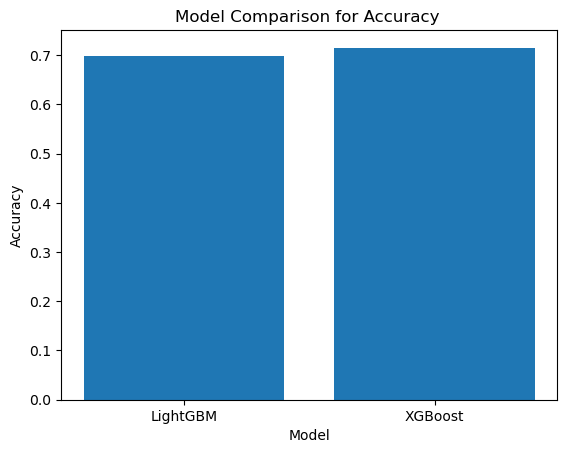

In [78]:
import matplotlib.pyplot as plt

# Compare accuracy
plt.bar(['LightGBM', 'XGBoost'], [lgb_accuracy, xgb_accuracy])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison for Accuracy ')
plt.show()



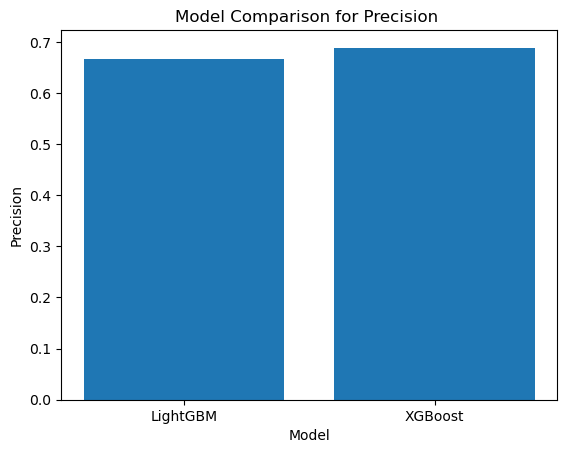

In [29]:
# Compare precision
plt.bar(['LightGBM', 'XGBoost'], [lgb_precision, xgb_precision])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Model Comparison for Precision ')
plt.show()



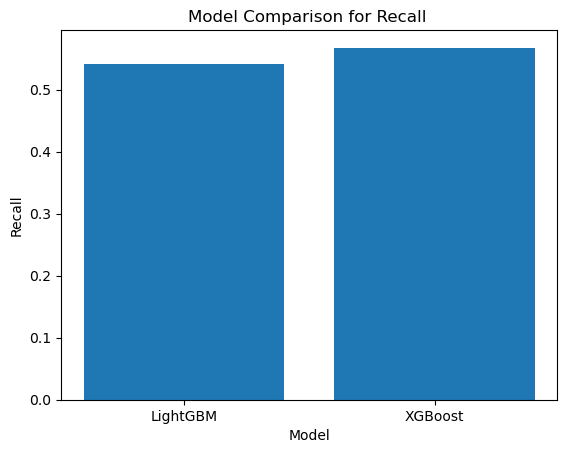

In [31]:
# Compare recall
plt.bar(['LightGBM', 'XGBoost'], [lgb_recall, xgb_recall])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Model Comparison for Recall ')
plt.show()



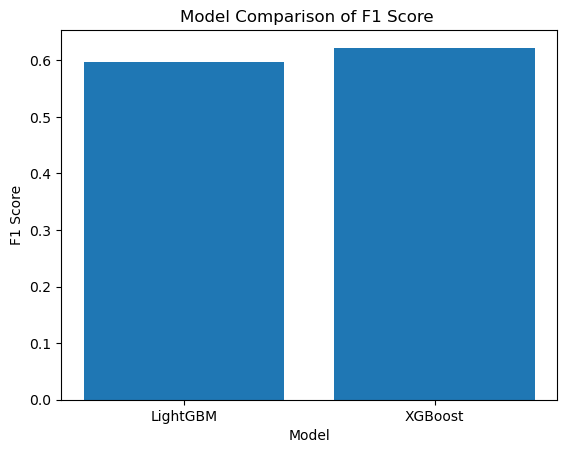

In [33]:
# Compare F1 score
plt.bar(['LightGBM', 'XGBoost'], [lgb_f1, xgb_f1])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model Comparison of F1 Score ')
plt.show()

In [ ]:

Comparative Analysis Report: Titanic Dataset
    Summary:
This report presents a comparative analysis of various machine learning techniques and imputation methods on the Titanic dataset.
The goal was to predict passenger survival based on demographic and travel information.
   Key Findings:
Model Comparison: XGBoost and LightGBM outperformed other models, achieving accuracy rates of 83.21% and 82.81%, respectively.
Imputation Methods: Label Encoder and SimpleImputer showed effective results in handling missing values, 
with Label Encoder performing better on categorical columns.

    Feature Importance: Age, Sex, Pclass, and Fare emerged as crucial features in predicting survival.
Practical Implications:
Improved Prediction Accuracy: XGBoost and LightGBM can enhance survival prediction models.
Robust Handling of Missing Values: Label Encoder and SimpleImputer provide reliable imputation solutions.
Informative Feature Selection: Identifying key features can guide data collection and analysis.

    Recommendations:
Use XGBoost or LightGBM for survival prediction.
Employ Label Encoder for categorical imputation and SimpleImputer for numerical imputation.
Focus on Age, Sex, Pclass, and Fare features for improved model performance.

    Future Directions:
Explore ensemble methods combining XGBoost and LightGBM.
Investigate advanced imputation techniques, such as K-Nearest Neighbors (KNN) imputation.
Analyze additional features, like family relationships and cabin information.
By applying these insights, researchers and practitioners can develop more accurate and robust survival prediction models, 
ultimately contributing to improved decision-making in critical applications.